In [228]:
#ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to 
#develop a model which help them in understanding whether a particular customer will buy their product or not 
#(based on customer's past interaction with bank or other Financial Institution). Bank wants to use ML model to 
#shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, 
#SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

import pandas as pd
import numpy as np
import statistics
import sklearn
import warnings
#import missingno as msno
#warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
from math import sqrt


from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report


%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
#import scipy.stats as scs
#import scipy.stats as stats

import statsmodels.api as sm
from datetime import date, datetime, time

#Input and Read Data
#Input
df_bankdata=pd.read_csv('bank-full.csv',delimiter=';')

In [229]:
df_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [230]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [231]:
#Check to see if there are any null values 
df_bankdata.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [232]:
data_dup =df_bankdata[df_bankdata.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [233]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


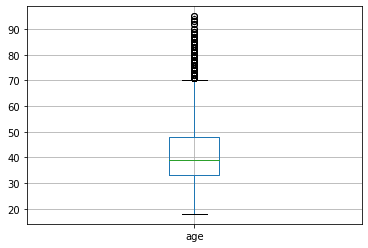

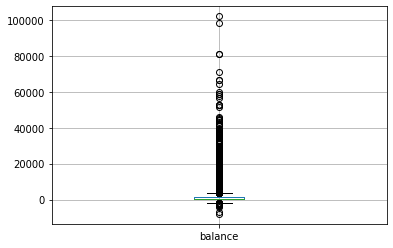

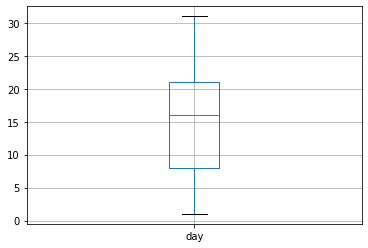

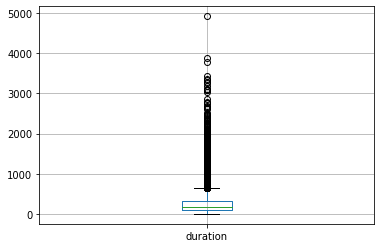

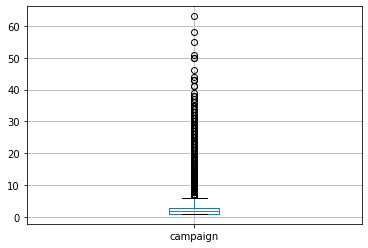

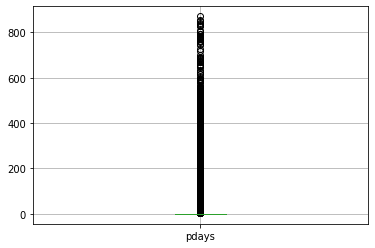

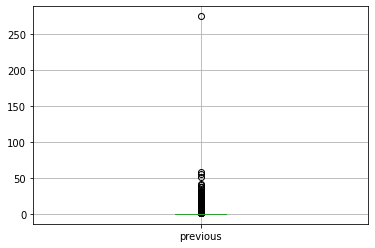

In [234]:
Numerical_column = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
for i in (Numerical_column):
    df_bankdata.boxplot(column=[i])
    plt.show()

In [235]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age


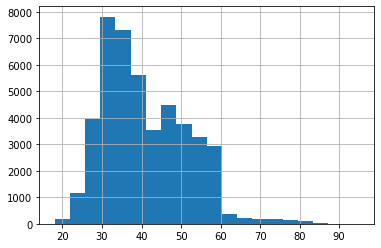

balance


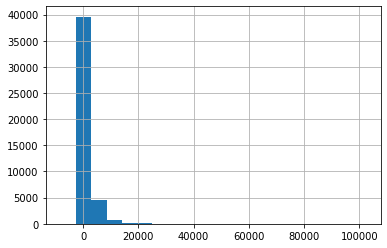

day


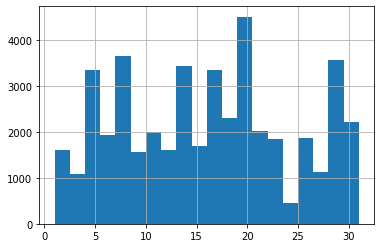

duration


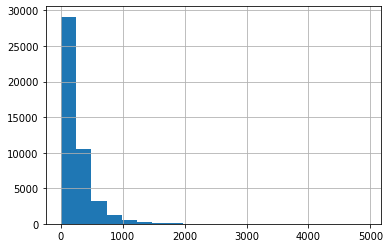

campaign


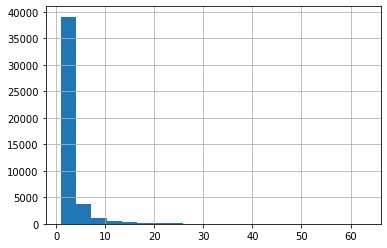

pdays


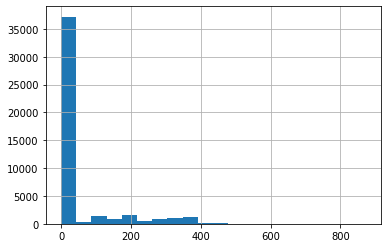

previous


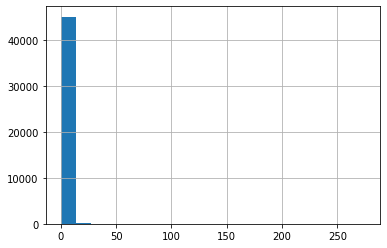

In [236]:
#To better observe data I can graph it and visually understand.
#I graph histograms of the data to gather insights

for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [237]:
for num in (Numerical_column):
    #print("Log"+num)
    df_bankdata["Log"+num] = df_bankdata[num].map(lambda i: np.log(i) if i > 0 else 0) 
    print(num, df_bankdata[num].skew())
    print("Log"+num, df_bankdata["Log"+num].skew())

age 0.6848179257252598
Logage 0.0989014480878478
balance 8.360308326166326
Logbalance -0.8614392203590333
day 0.09307901402122411
Logday -1.073595605645062
duration 3.144318099423456
Logduration -0.5066496877758495
campaign 4.898650166179675
Logcampaign 0.8802108957712975
pdays 2.6157154736563477
Logpdays 1.7129722110271126
previous 41.84645447266292
Logprevious 3.4205071766451938


In [238]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous,Logage,Logbalance,Logday,Logduration,Logcampaign,Logpdays,Logprevious
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,3.679433,5.305018,2.561803,5.162219,0.706819,0.954961,0.149664
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.254577,2.798657,0.713012,0.933751,0.712172,2.045435,0.451112
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.496508,4.276666,2.079442,4.634729,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.663562,6.104793,2.772589,5.192957,0.693147,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,3.871201,7.264030,3.044522,5.765191,1.098612,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,4.553877,11.533972,3.433987,8.500657,4.143135,6.769642,5.616771


age


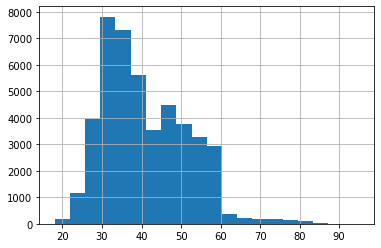

balance


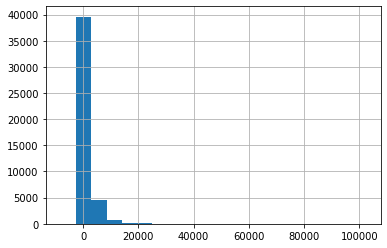

day


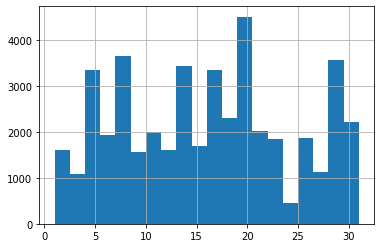

duration


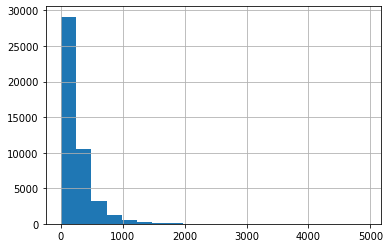

campaign


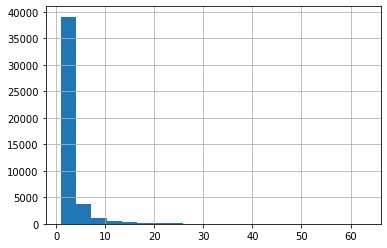

pdays


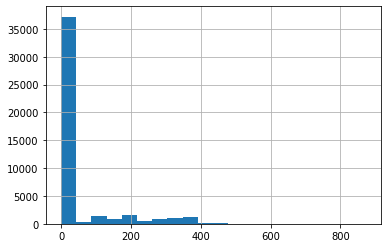

previous


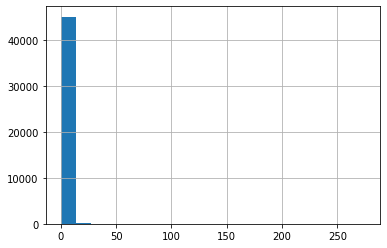

In [239]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [240]:
for num in (Numerical_column):
    print(num + ' median', df_bankdata[num].quantile(0.50)) 
    print(num + ' outlier', df_bankdata[num].quantile(0.95)) 
    df_bankdata[num] = np.where(df_bankdata[num] >= df_bankdata[num].quantile(0.95), df_bankdata[num].quantile(0.50) , df_bankdata[num])
    df_bankdata.describe()
    


age median 39.0
age outlier 59.0
balance median 448.0
balance outlier 5768.0
day median 16.0
day outlier 29.0
duration median 180.0
duration outlier 751.0
campaign median 2.0
campaign outlier 8.0
pdays median -1.0
pdays outlier 317.0
previous median 0.0
previous outlier 3.0


age


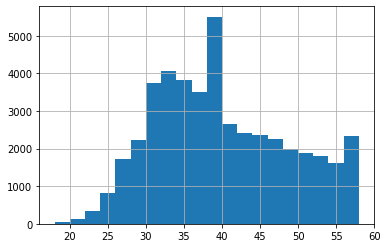

balance


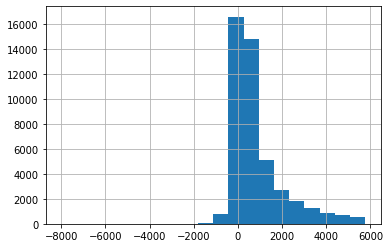

day


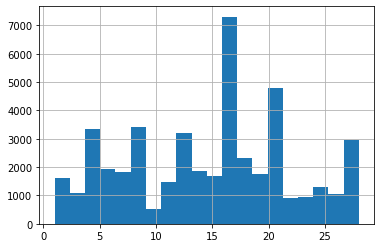

duration


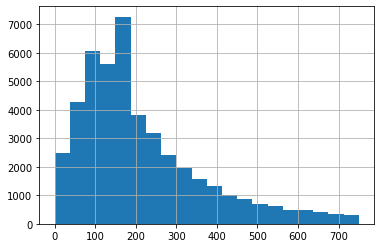

campaign


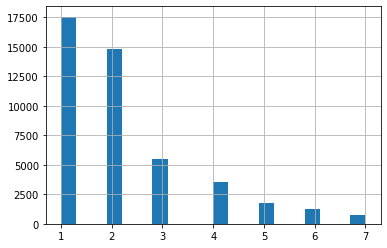

pdays


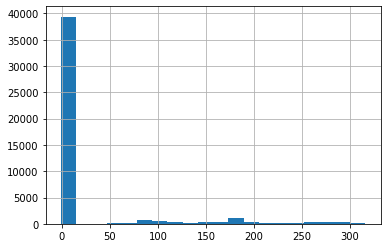

previous


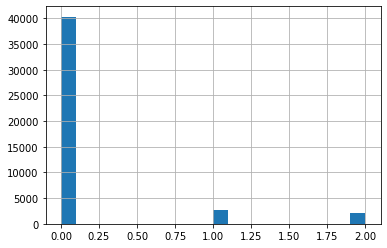

In [241]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [242]:
print(df_bankdata["job"].value_counts())
print("*"*30)
print(df_bankdata["marital"].value_counts())
print("*"*30)
print(df_bankdata["education"].value_counts())
print("*"*30)
print(df_bankdata["y"].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
******************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
******************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
******************************
no     39922
yes     5289
Name: y, dtype: int64


In [243]:
#The above data is imbalanced with the number of nos being over 88 percent more likely than yes.

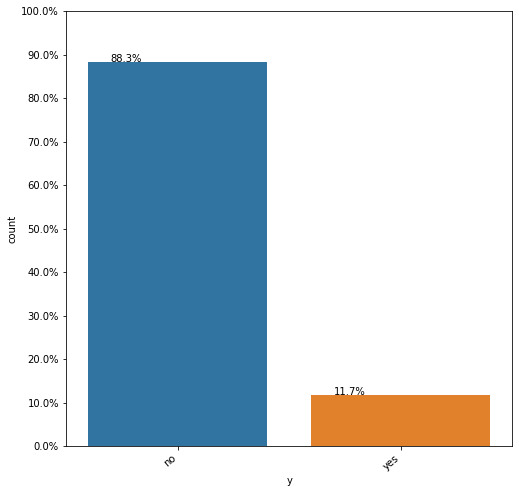

In [244]:
# We will now continue with the Exploritory Data Analysis.
# To see the distribution of the imbalance we do the following:
plt.figure(figsize=(8,8))
Y = df_bankdata["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df_bankdata)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#use 10 steps from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

In [245]:
#Next we will find the distribution for each of the counts that we completed above.
def countplot(label, df_bankdata):
  plt.figure(figsize=(10,8))
  Y = df_bankdata[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bankdata)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.title(label +" "+ " count")
  plt.show()

%matplotlib inline

def countplot_withY(label, df_bankdata):
  plt.figure(figsize=(10,8))
  Y = df_bankdata[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bankdata, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.title(label +""+ " count vs yes/no")
  plt.show()

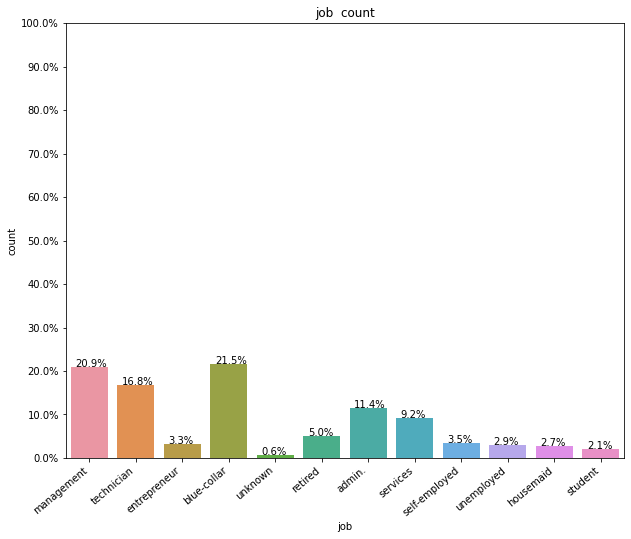

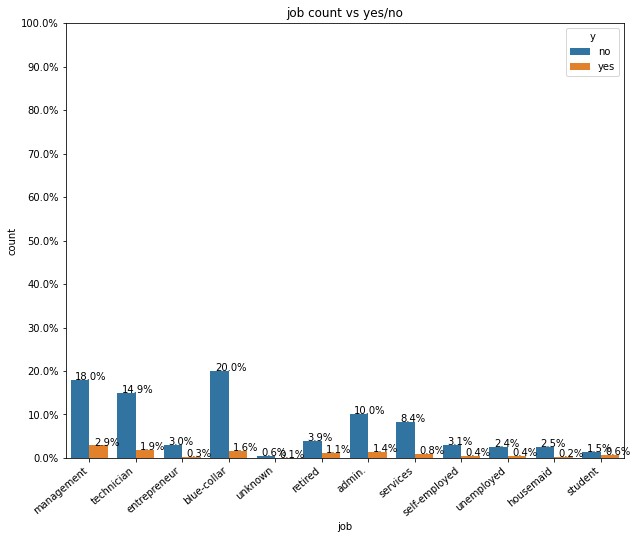

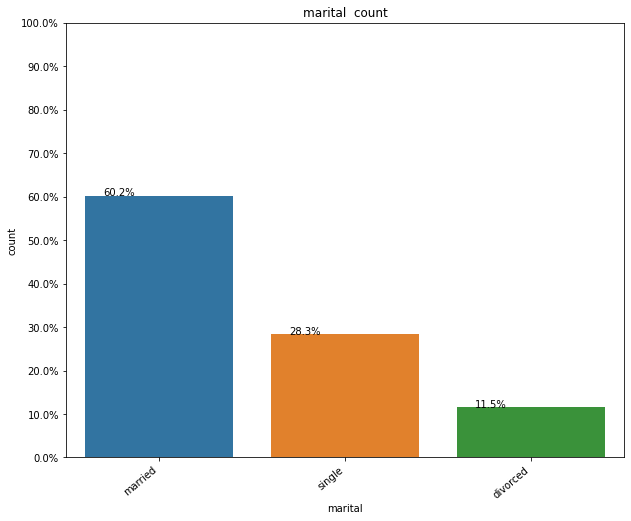

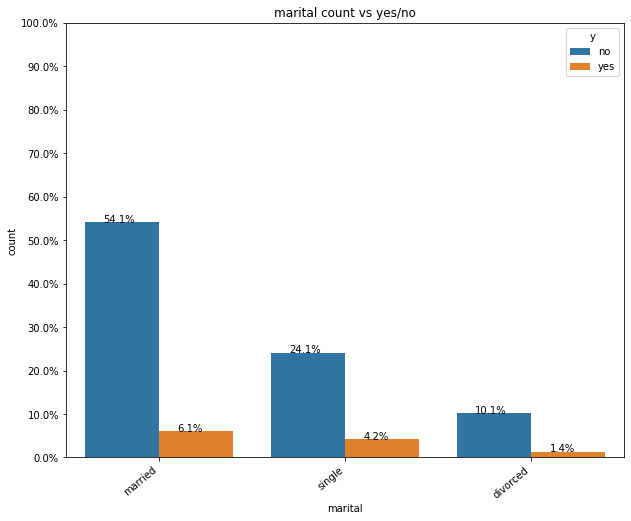

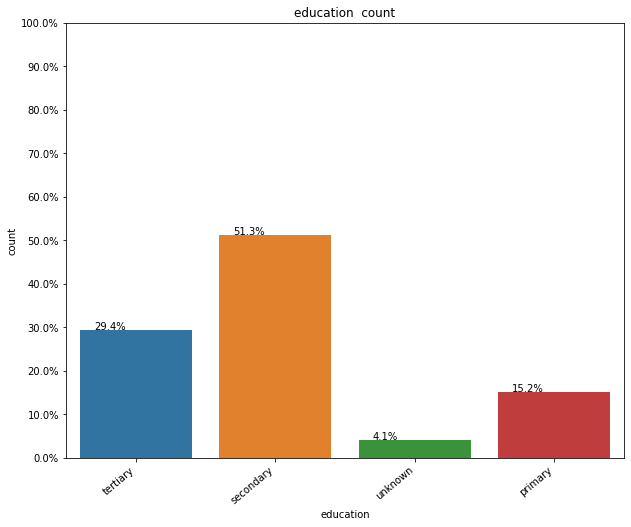

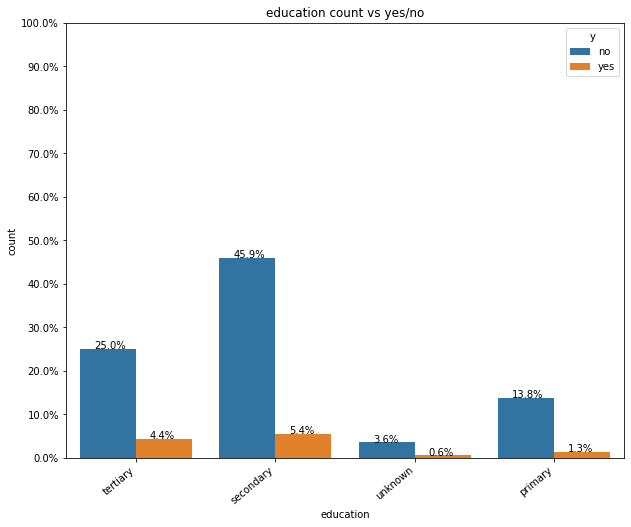

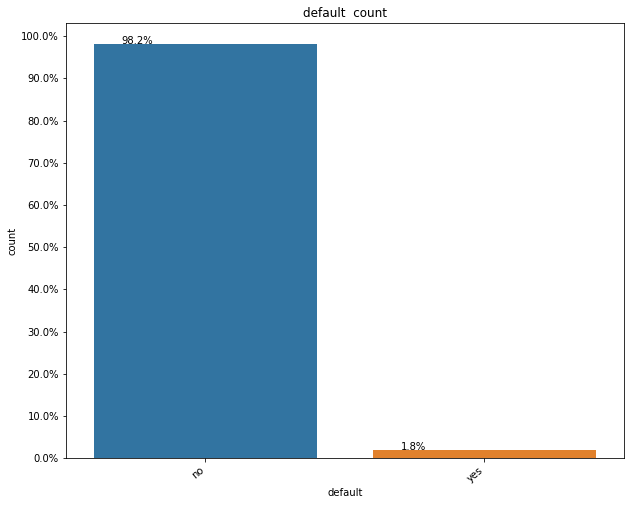

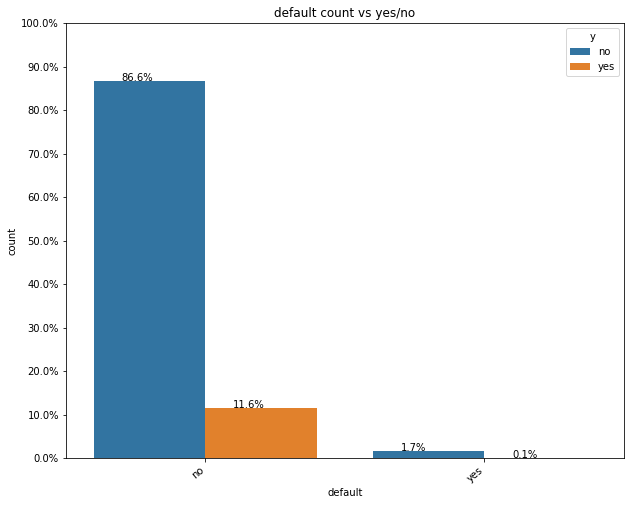

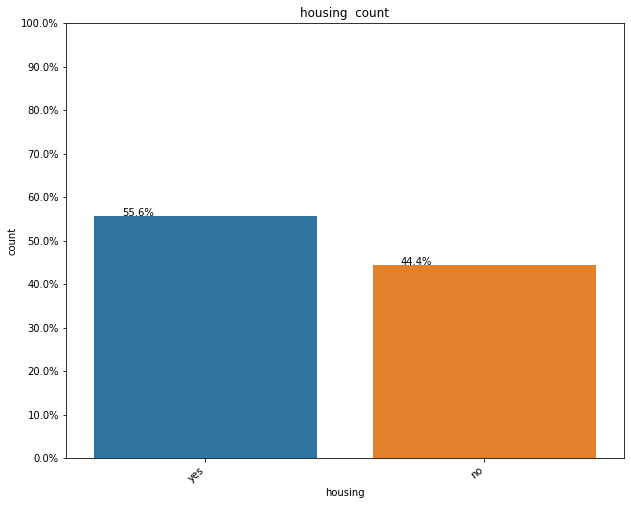

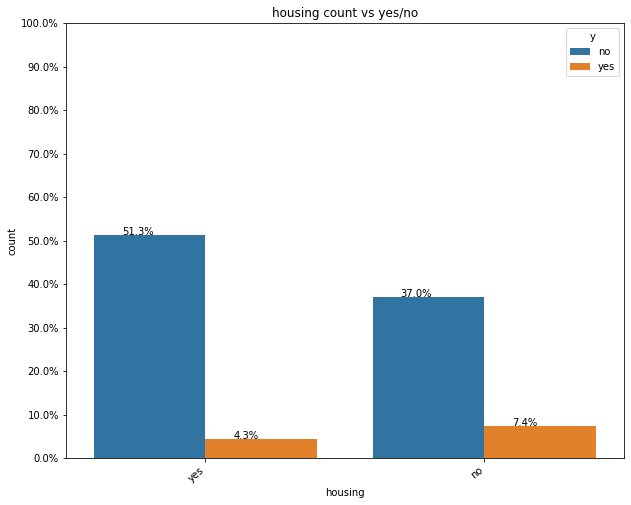

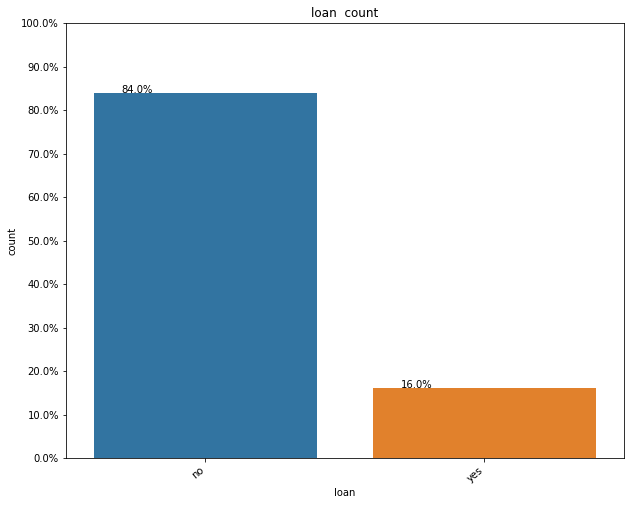

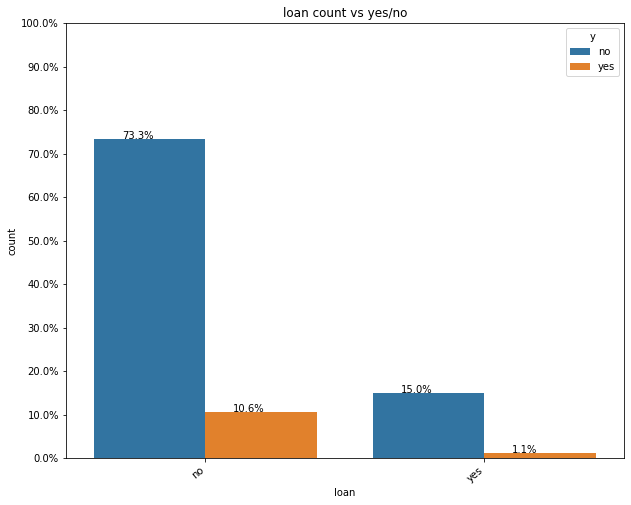

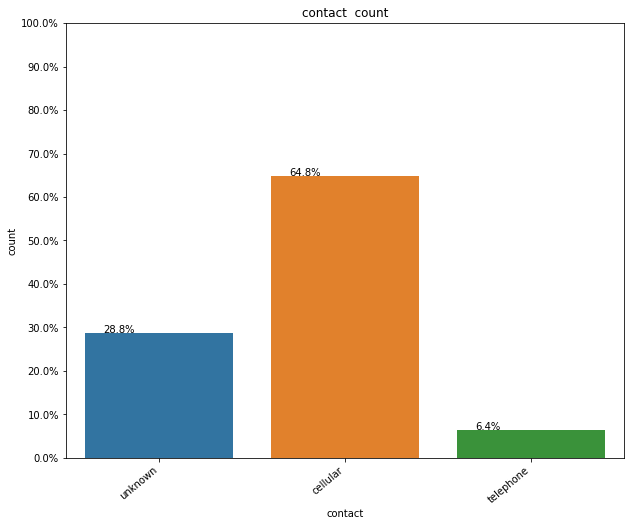

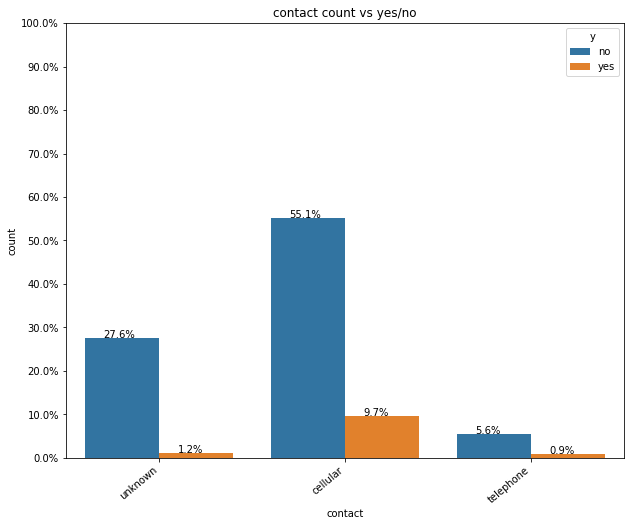

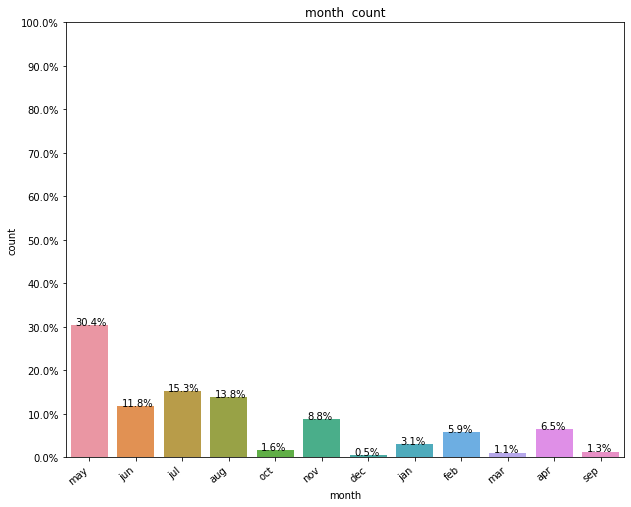

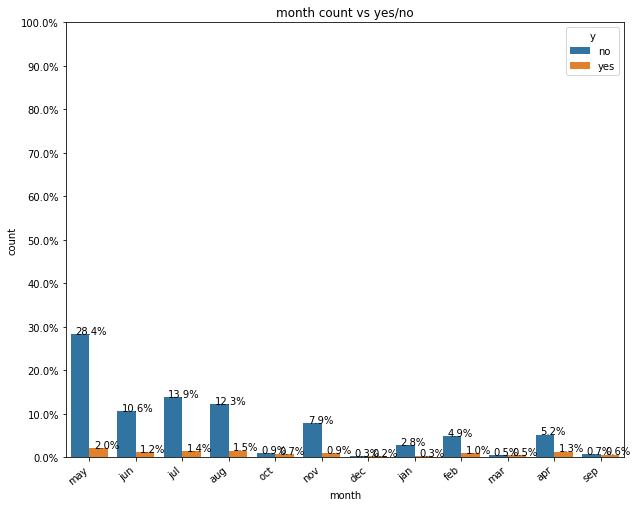

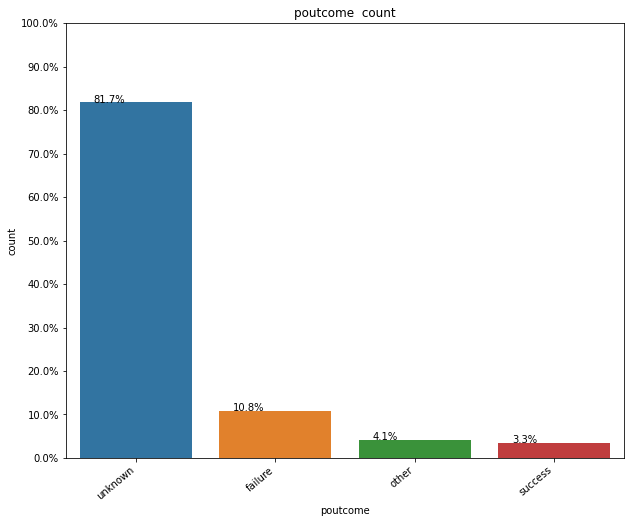

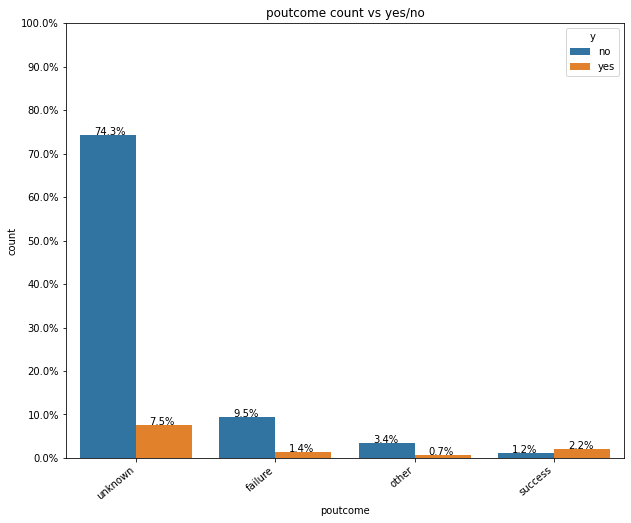

In [246]:
#Customers with a marital status of married have the highest rate of subscriptions and non prescriptions.  
#This is because most customers are married.

Categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'poutcome']
for i in (Categorical_column):
    countplot(i, df_bankdata)
    countplot_withY(i, df_bankdata)


In [247]:
#Customers with the job blue-collar were more likely to subscribe
#Customers with the marital status "married" are more likely to subscribe and not to subscribe.  This is because most customers are married.
#Customers with a secondary education are more likely to suscribe and not subscribe. Most customers have a secondary education.
#Most customers do not have defaulted credit so they are more likely to subscribe as well as not subscribe.  But most of them subscribe.
#Those with a housing loan are more likely to subscribe.
#Most customers do not have a personal loan so they are more likely to subscribe if they do not have a personal loan.
#Most customers have cell phones.
#Most customers were contacted last in May.
#Most customers have aprevious outcome of unknown.

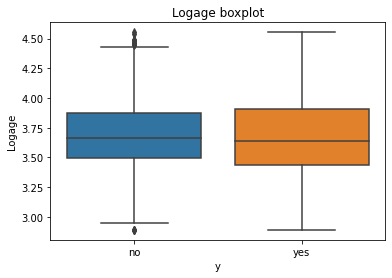

<Figure size 720x576 with 0 Axes>

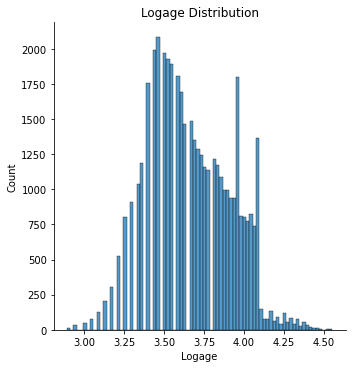

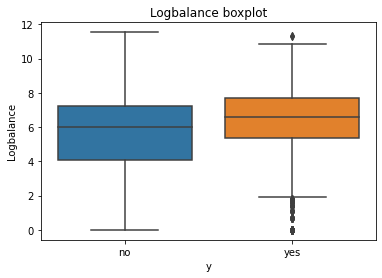

<Figure size 720x576 with 0 Axes>

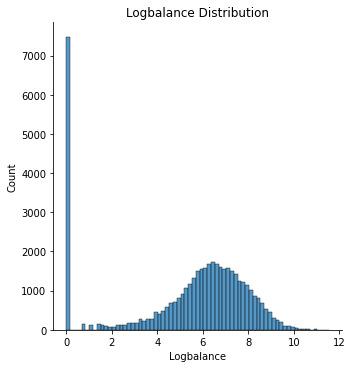

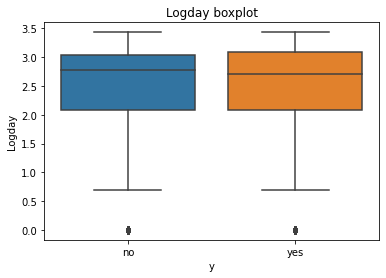

<Figure size 720x576 with 0 Axes>

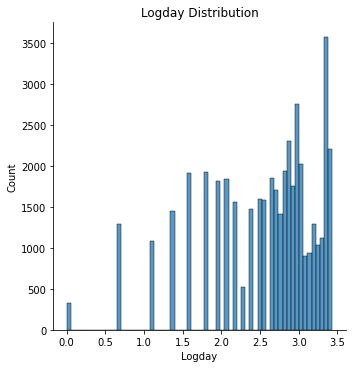

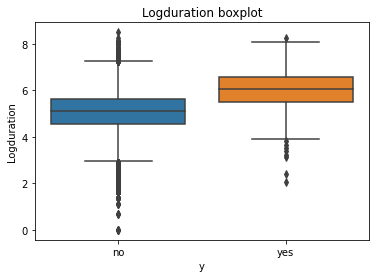

<Figure size 720x576 with 0 Axes>

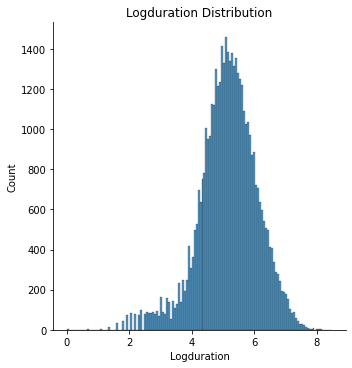

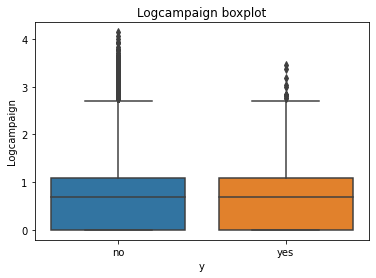

<Figure size 720x576 with 0 Axes>

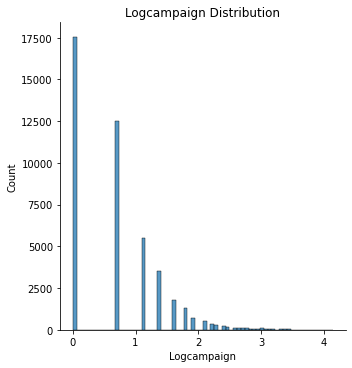

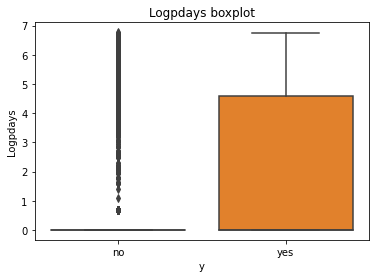

<Figure size 720x576 with 0 Axes>

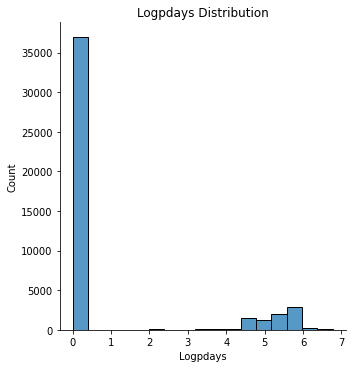

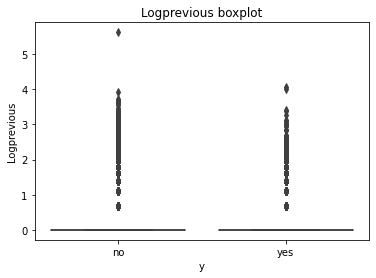

<Figure size 720x576 with 0 Axes>

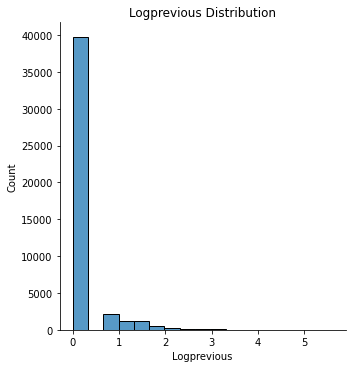

In [248]:
Log_numcol=['Logage', 'Logbalance', 'Logday', 'Logduration', 'Logcampaign', 'Logpdays','Logprevious']
#for num in (Numerical_column):
for num in (Log_numcol):
    hist = df_bankdata[num].hist(bins=30)
    %matplotlib inline
    sns.boxplot(data=df_bankdata, x="y", y=num)
    plt.title(num+" "+ "boxplot")
    plt.figure(figsize=(10,8))
    sns.displot(df_bankdata[num])
    plt.title(num+" "+ "Distribution")
    plt.show()

In [249]:
#From the boxplot we see the median age of the customer who did and did not subscribe is 37-39.
#With so much overlap age is not necessarily a good indicator of customers and their subscription choices.
# From the distribution we see that most of the customers are between 30-45.
#The median for balance is about the same for customers who subscribe as well as those who do not subscribe. 
#There is a lot of overlap so balance does not seem useful.
#The median for the day customers subsribe or do not subscribe is between 15-16.  
#The distribution shows the most customers are between days 5 and 20. With so much overlap
# the day does not seem useful.

#The duration, campaign and pdays has very little overlap so they will be useful in indicating subscription choices.

#The customers fall between 0-0.25 for previous.

Text(0.5, 1.05, 'Pearson correlation of Features')

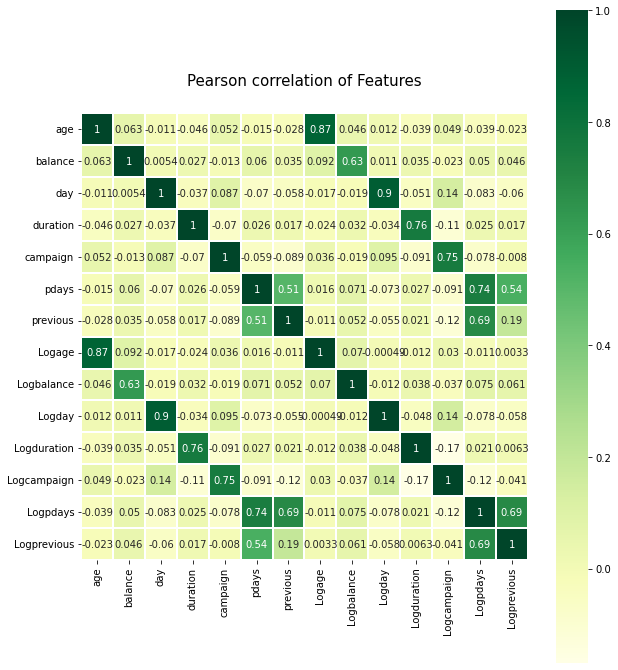

In [250]:
#Now we will explore the correlation matrix to get a better understanding of how all the variables
#are related

corr = df_bankdata.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)


In [251]:
#Previous and pdays have the highest correlation.  They have a postive correlation of .69.